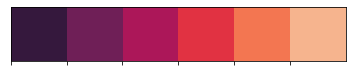

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pallete = sns.color_palette("rocket")
sns.palplot(pallete)

###  CORET-CORET

In [2]:
mahasiswa = pd.read_csv('Dataset1_TranscriptMahasiswa.csv',sep=';')
dosen = pd.read_csv('Dataset2_EvaluasiDosenPerMK.csv',sep=';')

In [3]:
mahasiswa.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [4]:
### Checking data types
mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

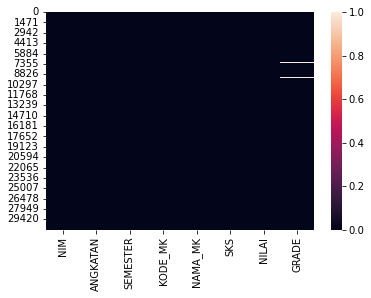

In [5]:
### visualizing missing data
sns.heatmap(mahasiswa.isna())
mahasiswa.isnull().sum(axis = 0)

In [6]:
### menghitung banyaknya mahasiswa dan jenis matakuliah
print(f'Banyaknya Mahasiswa : {len(mahasiswa.NIM.unique())}')
print(f'Banyaknya Matakuliah : {len(mahasiswa.NAMA_MK.unique())}')
print(f'Banyaknya Angkatan : {len(mahasiswa.ANGKATAN.unique())}')

Banyaknya Mahasiswa : 770
Banyaknya Matakuliah : 176
Banyaknya Angkatan : 9


In [7]:
### test angkatan
mahasiswa.ANGKATAN.value_counts()

2015    4643
2014    4464
2013    3881
2011    3787
2010    3549
2016    3395
2017    3133
2018    2016
2012    2002
Name: ANGKATAN, dtype: int64

In [8]:
mahasiswa['NIM']

0        10110310002
1        10110310002
2        10110310002
3        10110310002
4        10110310002
            ...     
30865          33849
30866          33849
30867          33849
30868          33849
30869          33849
Name: NIM, Length: 30870, dtype: int64

In [9]:
mahasiswa['JURUSAN'] = mahasiswa['NIM'].astype('str')
mahasiswa['JURUSAN'] = mahasiswa['JURUSAN'].str[:7]

In [10]:
jurusan = pd.DataFrame(mahasiswa['JURUSAN'].value_counts())
jurusan
# dapat disimpulkan 2 digit dari nim merupakan penanda ANGKATAN. akan tetapi banyak angkatan yang tidak terlihat,
# seperti angkatan 2015,2016,2017,2018

,JURUSAN
1411031,4464
1311031,3881
1111031,3787
1011031,3549
1211031,2002
...,...
28843,14
28853,14
28870,14
28877,14


In [11]:
jurusan[jurusan['JURUSAN']<=2000].sum()/4

JURUSAN    3296.75
dtype: float64

In [12]:
# uji bentuk nim
# 2015,2016,2017,2018 masi tidak berbentuk nim seperti seharusnya
list_angkatan = [2015,2016,2017,2018]
test_nim = mahasiswa[mahasiswa['ANGKATAN'].isin(list_angkatan)]
test_nim

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
17683,8429,2015,1511,EM190,Pengantar Manajemen & Bisnis,3,68.0,B-,8429
17684,8429,2015,1511,EM372,Pengantar Ekonomi,2,55.0,C,8429
17685,8429,2015,1511,IF110,Pengantar Teknologi Multimedia,3,75.0,B+,8429
17686,8429,2015,1511,IF140,Logika Pemrograman,3,68.0,B-,8429
17687,8429,2015,1511,IS100,Sistem Informasi Dalam Manajemen,3,100.0,A,8429
...,...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E,33849
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E,33849
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D,33849
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E,33849


In [13]:
# akan diambil sebuah sample dengan nim 8429
test_nim[test_nim['NIM']==8429]
# dari sini dapat dilihat bahwa kode semester berbentuk xxyz, yang xx adalah tahun, y adalah semester, z adalah belum diketahui

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
17683,8429,2015,1511,EM190,Pengantar Manajemen & Bisnis,3,68.0,B-,8429
17684,8429,2015,1511,EM372,Pengantar Ekonomi,2,55.0,C,8429
17685,8429,2015,1511,IF110,Pengantar Teknologi Multimedia,3,75.0,B+,8429
17686,8429,2015,1511,IF140,Logika Pemrograman,3,68.0,B-,8429
17687,8429,2015,1511,IS100,Sistem Informasi Dalam Manajemen,3,100.0,A,8429
17688,8429,2015,1511,IS110,Matematika Bisnis,3,85.0,A,8429
17689,8429,2015,1511,UM122,Bahasa Inggris 1,2,79.0,B+,8429
17690,8429,2015,1511,UM152,Agama,2,71.0,B,8429
17691,8429,2015,1521,IK402,Komunikasi Interpersonal,2,95.0,A,8429
17692,8429,2015,1521,IS220,Interaksi Manusia dan Komputer,3,80.0,A-,8429


In [14]:
### filling missing values : 
mahasiswa.isnull().sum(axis = 0)

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
JURUSAN       0
dtype: int64

In [15]:
### check nilai kosong
mahasiswa[mahasiswa['NILAI'].isnull()]
### F merupakan pelanggaran akademik

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
18866,9931,2015,1811,IS341,Sistem Basis Data,3,NaN,F,9931
21965,12407,2015,1621,IS432,Pengantar E-Business,3,NaN,F,12407
22633,13019,2016,1821,IS670,Audit Sistem Informasi,3,NaN,F,13019
25920,19365,2017,1811,IS341,Sistem Basis Data,3,NaN,F,19365
26030,19601,2017,1721,IS201,Proses Bisnis Korporat,3,NaN,F,19601
26760,21116,2017,1711,IF110,Pengantar Teknologi Multimedia,3,NaN,F,21116
26901,21159,2017,1821,UM321,Bahasa Inggris 3,2,NaN,F,21159
27520,22742,2017,1721,IS230,Algoritma dan Pemrograman,3,NaN,F,22742
27774,23564,2017,1721,IS230,Algoritma dan Pemrograman,3,NaN,F,23564
29423,28446,2018,1821,IS220,Interaksi Manusia dan Komputer,3,NaN,F,28446


In [16]:
mahasiswa[mahasiswa['GRADE'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
10,10110310002,2010,1021,SI214,SI214 Manajemen Operasional,3,71.0,NaN,1011031
16,10110310002,2010,1111,SI301,SI301 Sistem Informasi Manajemen,3,89.0,NaN,1011031
32,10110310002,2010,1211,SI527,SI527 Enterprise Resource Planning,3,73.0,NaN,1011031
53,10110310004,2010,1021,EM201,Dasar-dasar Manajemen,3,58.0,NaN,1011031
68,10110310004,2010,1121,TI403,Sistem Basis Data,4,72.0,NaN,1011031
...,...,...,...,...,...,...,...,...,...
10183,13110310019,2013,1711,IS534,Pemrograman Aplikasi Mobile,3,51.0,NaN,1311031
10188,13110310020,2013,1311,EM100,Dasar-dasar Bisnis,3,73.0,NaN,1311031
10196,13110310020,2013,1321,IK402,Komunikasi Interpersonal,2,72.0,NaN,1311031
10204,13110310020,2013,1411,SI210,Pemrograman Visual,3,74.0,NaN,1311031


In [17]:
mahasiswa[mahasiswa['NAMA_MK'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
442,10110310011,2010,1411,SI863,NaN,6,70.0,B,1011031
983,10110310022,2010,1411,SI863,NaN,6,79.0,B+,1011031
1528,10110310036,2010,1411,SI863,NaN,6,56.0,C,1011031
1626,10110310037,2010,1411,SI863,NaN,6,72.0,B,1011031
1919,10110310044,2010,1321,SI863,NaN,6,100.0,A,1011031
2019,10110310045,2010,1411,SI863,NaN,6,75.0,B+,1011031
2166,10110310047,2010,1411,SI863,NaN,6,73.0,B,1011031
2904,10110310070,2010,1321,SI863,NaN,6,85.0,A,1011031
2954,10110310071,2010,1411,SI863,NaN,6,74.0,B,1011031
3448,10110310083,2010,1411,SI863,NaN,6,88.0,A,1011031


In [18]:
mahasiswa[mahasiswa['KODE_MK']=='SI863']
### didapat SI863 merupakan kode matakuliah untuk tugas akhir

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
46,10110310002,2010,1321,SI863,SI863 Tugas Akhir,6,93.0,A,1011031
147,10110310005,2010,1321,SI863,SI863 Tugas Akhir,6,93.0,A,1011031
196,10110310006,2010,1321,SI863,SI863 Tugas Akhir,6,92.0,A,1011031
245,10110310007,2010,1321,SI863,SI863 Tugas Akhir,6,71.0,B,1011031
344,10110310009,2010,1311,SI863,SI863 Tugas Akhir,6,86.0,A,1011031
...,...,...,...,...,...,...,...,...,...
21888,12265,2015,1821,SI863,Tugas Akhir,6,80.0,A-,12265
21937,12381,2015,1811,SI863,Tugas Akhir,6,77.0,B+,12381
22222,12575,2015,1811,SI863,Tugas Akhir,6,79.0,B+,12575
22272,12700,2015,1811,SI863,Tugas Akhir,6,75.0,B+,12700


In [19]:
### cek sks
test_nim[test_nim['NIM']==8429]['SKS'].sum()

145

In [20]:
groupby_sks = mahasiswa.groupby('NIM',as_index=False).agg({'SKS':'sum'}).sort_values('SKS',ascending=False)
groupby_sks[groupby_sks['SKS']>=150]

,NIM,SKS
465,10110310044,290
554,11110310080,290
466,10110310045,290
468,10110310047,290
460,10110310037,290
459,10110310036,290
523,11110310035,290
513,11110310020,290
449,10110310022,290
504,11110310009,290


In [21]:
mahasiswa[mahasiswa['NIM']==10110310044]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
1824,10110310044,2010,1011,EM100,Dasar-dasar Bisnis,3,99.0,A,1011031
1825,10110310044,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,88.0,A,1011031
1826,10110310044,2010,1011,EM180,EM180 Matematika Bisnis,3,97.0,A,1011031
1827,10110310044,2010,1011,EM180,Matematika Bisnis,3,87.0,NaN,1011031
1828,10110310044,2010,1011,TI100,Algoritma dan Pemrograman,4,57.0,C,1011031
...,...,...,...,...,...,...,...,...,...
1917,10110310044,2010,1311,SK733,SK733 Jaringan Komputer Terapan 3,3,93.0,A,1011031
1918,10110310044,2010,1321,SI863,SI863 Tugas Akhir,6,92.0,A,1011031
1919,10110310044,2010,1321,SI863,NaN,6,100.0,A,1011031
1920,10110310044,2010,1411,SI860,Magang Kerja,4,90.0,A,1011031


In [22]:
mahasiswa[mahasiswa['NIM']==10110310044]['SEMESTER'].unique()

array([1011, 1021, 1111, 1121, 1211, 1221, 1311, 1321, 1411])

### DATA PROCESSING

#### data_mk

In [23]:
mata_kuliah = pd.DataFrame(dosen['MATAKULIAH'])
mata_kuliah['KODE_MK'] = mata_kuliah['MATAKULIAH'].str[:5]
mata_kuliah.drop_duplicates(inplace=True)
mata_kuliah = mata_kuliah.iloc[:,[1,0]]
mata_kuliah['MATAKULIAH'] = mata_kuliah['MATAKULIAH'].str[6:]
mata_kuliah.head()

,KODE_MK,MATAKULIAH
0,IS100,Management Information Systems
14,IS110,Business Mathematics
28,IS201,Corporate Business Processes
42,IS230,Algorithms and Programming
56,IS302,Operating Systems Concept


In [24]:
filter = list(mata_kuliah['KODE_MK'])
sks_kuliah = mahasiswa[['SKS','KODE_MK']]
sks_kuliah.drop_duplicates(inplace=True)
sks_kuliah = sks_kuliah.iloc[:,[1,0]]
sks_kuliah.head()
sks_kuliah = sks_kuliah[sks_kuliah['KODE_MK'].isin(filter)]

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
data_mk = pd.merge(mata_kuliah, sks_kuliah, on=["KODE_MK"])
data_mk.to_csv('data_mk.csv',index=False)

#### data_mahasiswa

In [26]:
data_angkatan=mahasiswa[['NIM','ANGKATAN']].copy()
data_angkatan.drop_duplicates(inplace=True)
data_angkatan.head()
data_angkatan.to_csv('data_angkatan.csv',index=False)

#### data_histori

In [27]:
data_nilai = mahasiswa[['NIM','ANGKATAN','SKS','KODE_MK','SEMESTER','NILAI','GRADE']].copy()
filter_mk = list(data_nilai['KODE_MK'].unique())
filter_nim = list(data_nilai['NIM'].unique().astype('str'))
data_sementara = pd.DataFrame(filter_nim,columns=['NIM'])
#data_sementara.head()
#i = 0
#for nim in filter_nim:
#    for mk in filter_mk:
#        data_sementara[mk] = 0
#

mahasiswa_lulus = data_nilai[data_nilai['ANGKATAN']<=2015].groupby(['NIM','ANGKATAN']).agg({'SKS':'sum','KODE_MK':'count'}).reset_index().copy()
mahasiswa_lulus.rename(columns={'SKS':'SKS_AMBIL','KODE_MK':'MK_AMBIL'},inplace=True)
mahasiswa_lulus[(mahasiswa_lulus['ANGKATAN']==2015) & (mahasiswa_lulus['SKS_AMBIL']>=144)].count()/(mahasiswa_lulus[mahasiswa_lulus['ANGKATAN']==2015]).count()
mahasiswa_lulus[mahasiswa_lulus['ANGKATAN']==2015].count()

NIM          96
ANGKATAN     96
SKS_AMBIL    96
MK_AMBIL     96
dtype: int64

<AxesSubplot:>

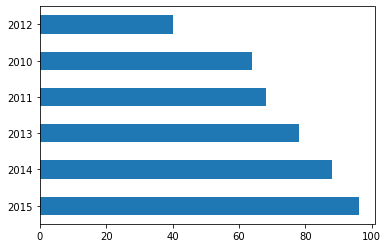

In [28]:
mahasiswa_lulus.ANGKATAN.value_counts().plot(kind='barh')

In [29]:
n = mahasiswa_lulus.shape[0]
mahasiswa_lulus['KETERANGAN'] = 'Tidak Ada Keputusan'
for i in range(n):
    if mahasiswa_lulus['ANGKATAN'][i]!=2015:    
        if mahasiswa_lulus['SKS_AMBIL'][i] < 144:
            mahasiswa_lulus['KETERANGAN'][i] = 'Tidak Tepat Waktu'
    else:
        if mahasiswa_lulus['SKS_AMBIL'][i] < 144:
            mahasiswa_lulus['KETERANGAN'][i] = 'Belum Waktunya Lulus'
mahasiswa_lulus.KETERANGAN.value_counts()


/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_2797/1374497471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa_lulus['KETERANGAN'][i] = 'Belum Waktunya Lulus'
/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_2797/1374497471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa_lulus['KETERANGAN'][i] = 'Tidak Tepat Waktu'


Tidak Ada Keputusan     357
Belum Waktunya Lulus     47
Tidak Tepat Waktu        30
Name: KETERANGAN, dtype: int64

In [30]:
data_sementara = data_nilai.copy()
#data_sementara.drop_duplicates(['NIM'],inplace=True)
data_sementara
data_sementara = data_sementara.pivot_table(index=['NIM','SEMESTER'], columns='KODE_MK', values='NILAI')
data_sementara.sort_values(by=['NIM'],ascending=0,inplace=True)

In [31]:
data_sementara.to_csv('data_histori.csv',index=False)

#### data transkrip

In [44]:
data_transkrip = mahasiswa[['NIM','KODE_MK','ANGKATAN','NILAI','GRADE']].copy()
data_transkrip = data_transkrip.pivot_table(index=['NIM','ANGKATAN'], columns='KODE_MK', values='NILAI')
data_transkrip.reset_index(inplace=True)
data_transkrip.sort_values('ANGKATAN',inplace=True)
data_transkrip.to_csv('data_transkrip.csv',index=False)
data_transkrip.head()

KODE_MK,NIM,ANGKATAN,CE441,CE551,CE651,CE751,EA100,EA201,EA410,EM100,...,UM141,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321
432,10110310002,2010,NaN,NaN,NaN,NaN,55.0,NaN,70.0,55.0,...,55.0,NaN,70.0,NaN,55.0,NaN,NaN,55.0,NaN,NaN
466,10110310045,2010,NaN,NaN,NaN,NaN,70.0,NaN,70.0,70.0,...,55.0,NaN,70.0,NaN,55.0,NaN,NaN,85.0,NaN,NaN
467,10110310046,2010,NaN,NaN,NaN,NaN,70.0,NaN,70.0,70.0,...,70.0,NaN,85.0,NaN,70.0,NaN,NaN,70.0,NaN,NaN
468,10110310047,2010,NaN,NaN,NaN,NaN,45.0,NaN,70.0,55.0,...,70.0,NaN,85.0,NaN,55.0,NaN,NaN,70.0,NaN,NaN
469,10110310048,2010,NaN,NaN,NaN,NaN,85.0,NaN,70.0,70.0,...,70.0,NaN,70.0,NaN,70.0,NaN,NaN,55.0,NaN,NaN


#### mahasiswa

In [33]:
from gradecalc import gradecalc
from fillgrade import fillgrade
from fillnilai import fillnilai

In [34]:
mahasiswa

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,JURUSAN
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,1011031
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,1011031
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,1011031
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,1011031
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,1011031
...,...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E,33849
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E,33849
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D,33849
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E,33849


In [35]:
mahasiswa = fillgrade(mahasiswa);
    

/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['GRADE'][i]  = 'C'
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['GRADE'][i]  = 'B'
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [36]:
mahasiswa.NILAI.fillna(0,inplace=True)
mahasiswa = fillnilai(mahasiswa)

/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['NILAI'][i] = 55.
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['NILAI'][i] = 70.
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [37]:
mahasiswa.isna().sum()

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI        0
GRADE        0
JURUSAN      0
dtype: int64

In [38]:
data_mk

,KODE_MK,MATAKULIAH,SKS
0,IS100,Management Information Systems,3
1,IS110,Business Mathematics,3
2,IS201,Corporate Business Processes,3
3,IS230,Algorithms and Programming,3
4,IS302,Operating Systems Concept,3
5,IS321,Information Systems Analysis and Design,3
6,IS341,Database Systems,3
7,IS403,Enterprise Resource Planning,3
8,IS422,Advanced IS Analysis & Design,3
9,IS432,Introduction to E-Business,3


In [39]:
mahasiswa[mahasiswa['NAMA_MK'].isna()]
mahasiswa.NAMA_MK.fillna('Tugas Akhir',inplace=True)
mahasiswa.isna().sum()
mahasiswa.to_csv('dataset1.csv',index=False)